<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [15]:
# ANSWER
titanic_csv = 'titanic_train.csv'
df = pd.read_csv(titanic_csv)

Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find candidate features to predict `Survived`. Get rid of null values. 

In [16]:
# ANSWER

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [17]:
# ANSWER
d3= df[['Survived','Pclass', 'Parch']]
d3.head()

,Survived,Pclass,Parch
0,0,3,0
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,0


#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [18]:
# ANSWERX = d3.drop('Survived', axis = 1)
feature_cols = ['Pclass', 'Parch']
X = d3[feature_cols]
y = d3['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
#x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [19]:
# ANSWER
# Create Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [20]:
# ANSWER
# Fit Model
model.fit(X_train, y_train)
predictions = model.predict(X_test)



The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [21]:
# ANSWER
print(model.coef_)

[[-0.88528877  0.37910902]]


The computed intercept (`intercept_`) is the 1st element of another array:

In [22]:
# ANSWER
print(model.intercept_)

[1.32709322]


We can create tuples of the predictor names and coefficients like this:

In [23]:
# ANSWER
print(set(zip(d3, model.coef_[0])))

{('Survived', -0.885288771917241), ('Pclass', 0.3791090228352829)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [24]:
for col in zip(X_train.columns, model.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.885289
Parch       +0.379109


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [27]:
print('accuracy = {:7.4f}'.format(model.score(X_train, y_train)))

accuracy =  0.6913


What is the  `accuracy_score` for the test data?

In [28]:
# ANSWER
print('accuracy = {:7.4f}'.format(logreg.score(X_test, y_test)))

accuracy =  0.6712


What can we say aout this result?

ANSWER
- test set is predicted however with low score
- No overfitting

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model

C:\Users\65911\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


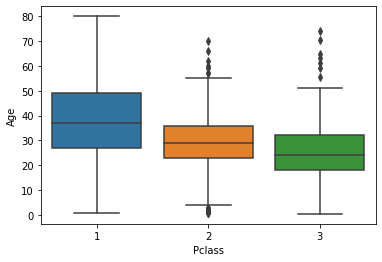

In [29]:
sns.boxplot(df['Pclass'], df['Age'])

#Imputation function

def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]

    

    if pd.isnull(age):

        if(passenger_class == 1):

            return df[df['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return df[df['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return df[df['Pclass'] == 3]['Age'].mean()

        

    else:

        return age

#Impute the missing Age data

df['Age'] = df[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

In [30]:
# ANSWER

d3= df[['Survived','Pclass', 'Parch', 'Age']]

y = d3['Survived']
X = d3.drop('Survived', axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

In [31]:
# Build Model
model = LogisticRegression()

# Fit Model
model.fit(X_train, y_train)

# Score
model_score = model.score(X_train, y_train)
print('accuracy = {:1.4f}'.format(model_score))

accuracy = 0.7198


So, including age did little to reduce the variance in our model. Why might this be?

ANSWER
- age is not related with survival
- age is not independent of other features 


Let's see where the model is going wrong by showing the Confusion Matrix:

In [33]:
# ANSWER
from sklearn.metrics import confusion_matrix

y_pred_class = model.predict(X_test)
#print(metrics.confusion_matrix(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

[[141  33]
 [ 62  59]]


Nb. Here is how `confusion_matrix` arranges its output:

In [34]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER: False Negative

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

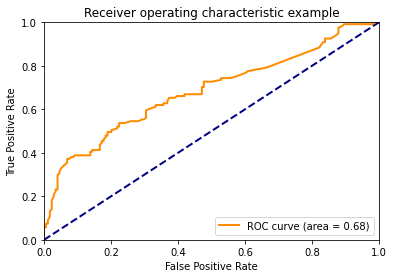

In [38]:

# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [39]:
titanic_with_dummies = pd.get_dummies(data = df, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first vriable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [40]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

In [41]:
titanic_with_dummies['Age'] = titanic_with_dummies['Age'].astype(int)


In [42]:
titanic_with_dummies['Fare'] = titanic_with_dummies['Fare'].astype(int)

In [43]:
titanic_with_dummies

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35,0,0,373450,8,NaN,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,0,0,211536,13,NaN,0,1,0,0,1,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30,B42,1,0,0,0,1,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",25,1,2,W./C. 6607,23,NaN,1,0,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26,0,0,111369,30,C148,0,1,1,0,0,1,0,0


In [44]:
titanic_with_dummies.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

Now train the model using an expanded set of predictors (age, parents/children, siblings/spouses, class) and compute the accuracy score for the test set:

In [45]:
titanic_with_dummies

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22,1,0,7,0,1,0,0,1,0,0,1
1,1,38,1,0,71,1,0,1,0,0,1,0,0
2,1,26,0,0,7,1,0,0,0,1,0,0,1
3,1,35,1,0,53,1,0,0,0,1,1,0,0
4,0,35,0,0,8,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27,0,0,13,0,1,0,0,1,0,1,0
887,1,19,0,0,30,1,0,0,0,1,1,0,0
888,0,25,1,2,23,1,0,0,0,1,0,0,1
889,1,26,0,0,30,0,1,1,0,0,1,0,0


In [46]:
# ANSWER
# Set Features with both Numerical and the above specified Categorical features
y = d3['Survived']
X = titanic_with_dummies.drop('Survived', axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

Plot the ROC curve for the new model:

accuracy = 0.8255


C:\Users\65911\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


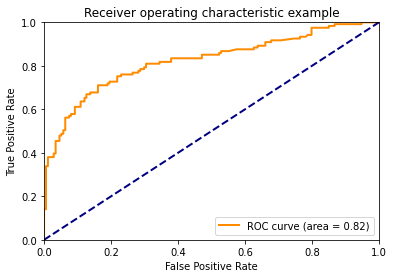

In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

model2 = LogisticRegression()

# Fit Model
model2.fit(X_train, y_train)

# Score
model_score = model.score(X_train, y_train)
print('accuracy = {:1.4f}'.format(model_score))

# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model2.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

Can we improve the model by including the remaining features?

In [ ]:
# ANSWER
# All remaining features were included in the previous model

## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?  
Tip : consult sklearn cross_val_score

3. Look at the False Positive Rate `FPR` & True Positive Rate `TPR` vectors for the best model.

In [51]:
from sklearn.model_selection import cross_val_score
target_col = 'Survived'
feature_cols = ['Age', 'SibSp', 'Parch', 'Fare', 
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']
logreg = LogisticRegression()
scores = cross_val_score(logreg, titanic_with_dummies[feature_cols], titanic_with_dummies[target_col], cv=5)
scores.mean()

C:\Users\65911\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\65911\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7991274872889336

In [53]:
# Build Model
logreg = LogisticRegression()

# Fit
logreg.fit(X_train, y_train)

# Predict
y_pred_class = logreg.predict(X_test)

# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, y_pred_class)
print(confusion)

#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[149  25]
 [ 39  82]]


C:\Users\65911\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred_class))

0.7830508474576271
0.7830508474576271


In [57]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - accuracy_score(y_test, y_pred_class))

0.21694915254237288
0.2169491525423729


In [61]:
from sklearn.metrics import recall_score
sensitivity = TP / float(FN + TP)
print(sensitivity) 
print(recall_score(y_test, y_pred_class))

0.6776859504132231
0.6776859504132231


In [62]:
specificity = TN / (TN + FP)

print(specificity)

0.8563218390804598


In [63]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.14367816091954022
0.14367816091954022


In [66]:
from sklearn.metrics import precision_score

precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_pred_class))

0.7663551401869159
0.7663551401869159




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



